In [19]:
import pathlib
import textwrap
import os
from dotenv import load_dotenv

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))



In [20]:
load_dotenv()
api_key= os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=api_key)

In [21]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [22]:
model_text = genai.GenerativeModel('gemini-pro')

In [23]:
%%time
response = model_text.generate_content("Give a resume of the book 'Desig Patterns'")

CPU times: user 10.3 ms, sys: 11.2 ms, total: 21.4 ms
Wall time: 9.32 s


In [24]:
to_markdown(response.text)

> **Design Patterns: Elements of Reusable Object-Oriented Software**
> 
> **Authors:** Erich Gamma, Richard Helm, Ralph Johnson, John Vlissides (the "Gang of Four")
> 
> **Summary:**
> 
> Design Patterns is a classic book that introduces and catalogs a collection of proven software design patterns. It provides a common language and framework for developers to discuss, understand, and implement reusable solutions to common software design problems.
> 
> **Structure:**
> 
> The book is divided into three parts:
> 
> **1. Introduction:**
> * Defines design patterns and their benefits
> * Introduces creational, structural, and behavioral patterns
> 
> **2. Creational Patterns:**
> * Singleton: Ensures there is only one instance of a class
> * Factory Method: Creates objects without specifying their concrete class
> * Abstract Factory: Provides an interface for creating families of related objects
> * Builder: Separates object construction from its representation
> 
> **3. Structural Patterns:**
> * Adapter: Makes unrelated classes work together by providing an intermediary
> * Bridge: Decouples interface from implementation
> * Composite: Composes objects into tree structures
> * Decorator: Attaches additional responsibilities to objects dynamically
> * Facade: Provides a unified interface to a complex subsystem
> * Flyweight: Reduces memory usage by sharing common objects
> * Proxy: Provides a surrogate or placeholder for another object
> 
> **4. Behavioral Patterns:**
> * Chain of Responsibility: Passes requests along a chain of handlers
> * Command: Encapsulates a request as an object
> * Interpreter: Defines a grammar for interpreting a language
> * Iterator: Provides a way to access elements of a collection
> * Mediator: Defines an object that mediates communication between a group of objects
> * Observer: Defines a dependency between objects so that when one object changes, others are notified
> * State: Allows an object to alter its behavior when its internal state changes
> * Strategy: Defines a family of algorithms, encapsulates each one, and makes them interchangeable
> 
> **Benefits:**
> 
> * **Reusable Solutions:** Provides a library of proven design patterns that can be applied to a wide range of software projects.
> * **Improved Code Quality:** Encourages the use of well-defined and tested patterns, leading to more robust and maintainable code.
> * **Common Language:** Establishes a standard vocabulary for discussing design patterns, facilitating communication among developers.
> * **Reduced Development Time:** By using pre-defined patterns, developers can avoid reinventing solutions and focus on project-specific requirements.
> 
> **Impact:**
> 
> Design Patterns has had a profound impact on software development. It has become a widely recognized and respected resource for software architects, designers, and programmers. Its principles and patterns continue to be applied in a wide variety of software systems and programming languages.

In [25]:
model_image = genai.GenerativeModel('gemini-pro-vision')

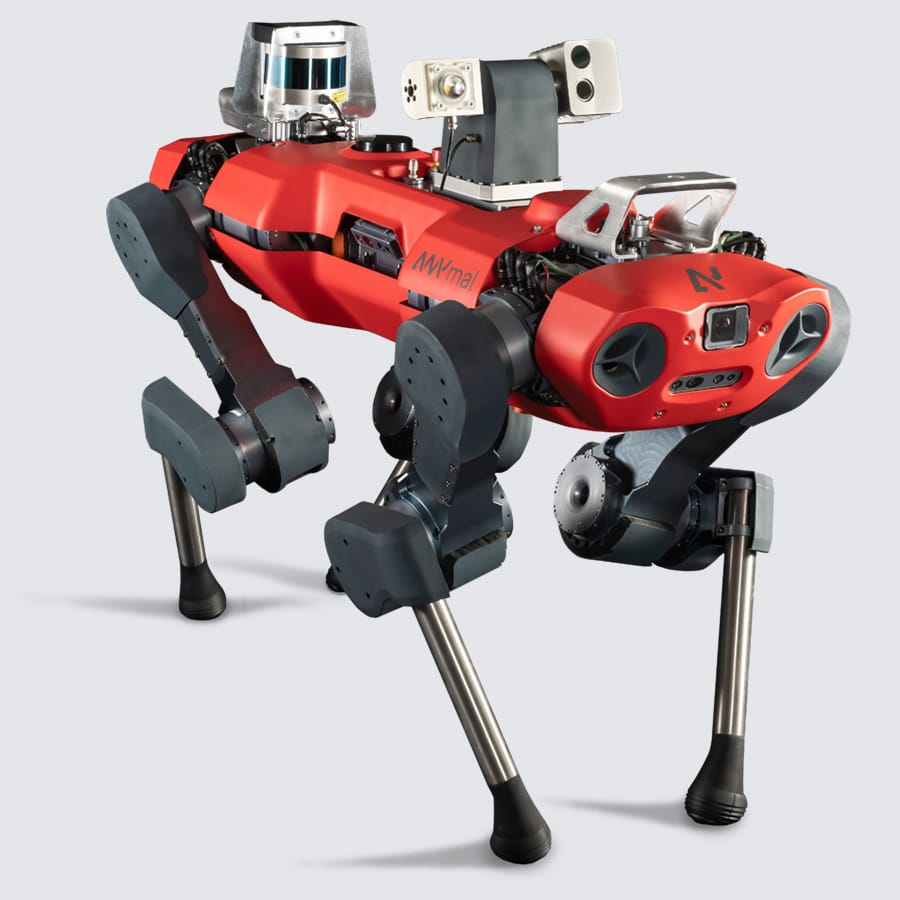

In [26]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [27]:
response = model_image.generate_content(img)

to_markdown(response.text)

>  The ANYmal is a quadruped robot designed and manufactured by ANYbotics, a spin-off of the Swiss Federal Institute of Technology in Zurich (ETH Zurich). It is designed to be highly mobile and capable of traversing rough terrain. The ANYmal has been used for a variety of applications, including search and rescue, inspection, and delivery.

In [28]:
model_chat = genai.GenerativeModel('gemini-pro')
chat = model_chat.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-pro',
        generation_config={},
        safety_settings={},
        tools=None,
    ),
    history=[]
)

In [29]:
response = chat.send_message("What is a TPU?")
to_markdown(response.text)

> **Thermoplastic Polyurethane (TPU)**
> 
> **Definition:**
> 
> TPU is a versatile thermoplastic elastomer that combines the properties of both plastics and rubber.
> 
> **Properties:**
> 
> * **Exceptional Flexibility:** Extremely flexible and can stretch up to 500% without breaking.
> * **High Strength and Durability:** Strong, abrasion-resistant, and tear-resistant.
> * **Resistance to Oils, Chemicals, and UV Light:** Chemically inert and resistant to degradation from oils, chemicals, and UV exposure.
> * **Temperature Resistance:** Maintains its flexibility and strength over a wide temperature range (-40°C to 130°C).
> * **Transparency or Opacity:** Available in both transparent and opaque forms.
> 
> **Types:**
> 
> There are two main types of TPUs:
> 
> * **Polyether-Based:** Soft and highly elastic with good flexibility in cold temperatures.
> * **Polyester-Based:** Harder and more durable with better abrasion resistance than polyether-based TPUs.
> 
> **Applications:**
> 
> TPU is used in a wide range of applications, including:
> 
> * **Automotive:** Bumpers, hoses, seals, and weatherstripping
> * **Medical:** Catheters, tubing, implants, and protective equipment
> * **Construction:** Roofing membranes, hoses, and sealants
> * **Consumer Products:** Smartphone cases, watch straps, footwear, and sporting goods
> * **Industrial:** Conveyor belts, hoses, and vibration dampeners
> 
> **Advantages:**
> 
> * Durable and long-lasting
> * Flexible and elastic
> * Resistant to harsh environments
> * Versatile and suitable for various applications
> 
> **Disadvantages:**
> 
> * Can be more expensive than some plastics and rubbers
> * Lower temperature resistance than some other polymers

In [30]:
chat.history

[parts {
   text: "What is a TPU?"
 }
 role: "user",
 parts {
   text: "**Thermoplastic Polyurethane (TPU)**\n\n**Definition:**\n\nTPU is a versatile thermoplastic elastomer that combines the properties of both plastics and rubber.\n\n**Properties:**\n\n* **Exceptional Flexibility:** Extremely flexible and can stretch up to 500% without breaking.\n* **High Strength and Durability:** Strong, abrasion-resistant, and tear-resistant.\n* **Resistance to Oils, Chemicals, and UV Light:** Chemically inert and resistant to degradation from oils, chemicals, and UV exposure.\n* **Temperature Resistance:** Maintains its flexibility and strength over a wide temperature range (-40°C to 130°C).\n* **Transparency or Opacity:** Available in both transparent and opaque forms.\n\n**Types:**\n\nThere are two main types of TPUs:\n\n* **Polyether-Based:** Soft and highly elastic with good flexibility in cold temperatures.\n* **Polyester-Based:** Harder and more durable with better abrasion resistance than p

In [31]:
response = chat.send_message("What the difference between GPU and TPU?")
to_markdown(response.text)

> **GPU (Graphics Processing Unit)** and **TPU (Tensor Processing Unit)** are both specialized computer chips designed for different purposes:
> 
> **GPU (Graphics Processing Unit)**
> 
> * Designed for parallel processing of graphics and image data.
> * Contains thousands of small, efficient cores optimized for handling large amounts of data in parallel.
> * Used primarily for rendering 3D graphics, video processing, and machine learning tasks that require high computational power.
> 
> **TPU (Tensor Processing Unit)**
> 
> * Designed specifically for machine learning and deep learning tasks.
> * Contains specialized cores optimized for performing tensor operations, which are mathematical operations used in machine learning algorithms.
> * Offers higher computational efficiency and power efficiency than GPUs for machine learning applications.
> 
> **Key Differences:**
> 
> | Feature | GPU | TPU |
> |---|---|---|
> | Purpose | Graphics processing and general-purpose computing | Machine learning and deep learning |
> | Core Type | Small, general-purpose cores | Specialized tensor cores |
> | Optimization | Optimized for parallel graphics processing | Optimized for tensor operations |
> | Computational Power | High computational power | Very high computational power for machine learning |
> | Power Efficiency | Lower power efficiency than TPUs | Higher power efficiency than GPUs for machine learning tasks |
> | Cost | Typically more expensive than TPUs | Typically less expensive than GPUs |
> 
> **Summary:**
> 
> * GPUs are suitable for a wider range of tasks, including graphics processing, video editing, and general-purpose computing.
> * TPUs are designed specifically for machine learning and deep learning tasks and offer superior performance and efficiency for these applications.

In [32]:
chat.history

[parts {
   text: "What is a TPU?"
 }
 role: "user",
 parts {
   text: "**Thermoplastic Polyurethane (TPU)**\n\n**Definition:**\n\nTPU is a versatile thermoplastic elastomer that combines the properties of both plastics and rubber.\n\n**Properties:**\n\n* **Exceptional Flexibility:** Extremely flexible and can stretch up to 500% without breaking.\n* **High Strength and Durability:** Strong, abrasion-resistant, and tear-resistant.\n* **Resistance to Oils, Chemicals, and UV Light:** Chemically inert and resistant to degradation from oils, chemicals, and UV exposure.\n* **Temperature Resistance:** Maintains its flexibility and strength over a wide temperature range (-40°C to 130°C).\n* **Transparency or Opacity:** Available in both transparent and opaque forms.\n\n**Types:**\n\nThere are two main types of TPUs:\n\n* **Polyether-Based:** Soft and highly elastic with good flexibility in cold temperatures.\n* **Polyester-Based:** Harder and more durable with better abrasion resistance than p